# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Learning Objective

At the end of the experiment, you will be able to :

- Understand the concept of Gradient descent method
- Observe the effect of learning rate


The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  L∝T2 .


##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

To know more about Gradient Descent and its variants you can refer the below link:

https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e

## Keywords



- Gradient Descent
- Learning Rate
- Error Function
- Decay 

In [0]:
# Import the required Packages
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# Print the first 5 rows of dataframe 'data'
print(data.head())
# Print the last 5 rows of dataframe 'data'
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

#### Vanilla/Batch Gradient Descent

In [0]:
"""
The function 'train' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized error is returned.
"""
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'train' function to get the updated values of m, c and error.
"""
def train_on_all(x, y, m, c, eta, iterations=1000):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

### Effect of varying LR on error and final line

Let us vary LR and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

### $\eta$ = 0.1

In [0]:
# Save errors
errs_1 = []
m, c = 0, 0
eta = 0.1
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.1.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_1.append(error)

# Save final line
m_1, c_1 = m, c

### $\eta$ = 0.01

In [0]:
errs_01 = []
m, c = 0, 0
eta = 0.01
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.01.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_01.append(error)

# Save final line
m_01, c_01 = m, c

### $\eta$ = 0.001

In [0]:
errs_001 = []
m, c = 0, 0
eta = 0.001
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.001.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta) 
    errs_001.append(error)

# Save final line
m_001, c_001 = m, c

### $\eta$ = 0.0001

In [0]:
errs_0001 = []
m, c = 0, 0
eta = 0.0001
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.0001. 
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_0001.append(error)

# Save final line
m_0001, c_0001 = m, c

## Plot of lines vs $\eta$

In [0]:
# Find the lines
y_1 = m_1 * l + c_1
y_01 = m_01 * l + c_01
y_001 = m_001 * l + c_001
y_0001 = m_0001 * l + c_0001

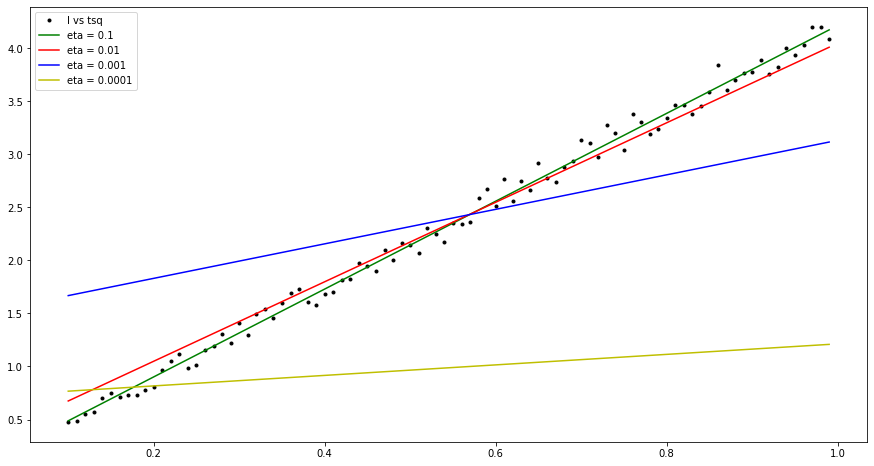

In [0]:
plt.figure(figsize=(15, 8))
plt.plot(l, tsq, '.k')
plt.plot(l, y_1, "g")
plt.plot(l, y_01, "r")
plt.plot(l, y_001, "b")
plt.plot(l, y_0001, "y")
plt.legend(["l vs tsq","eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

Thus, we see that higher learning rates reach the best fit faster than lower learning rates (obviously).

## Plot of errors vs epochs for each $\eta$

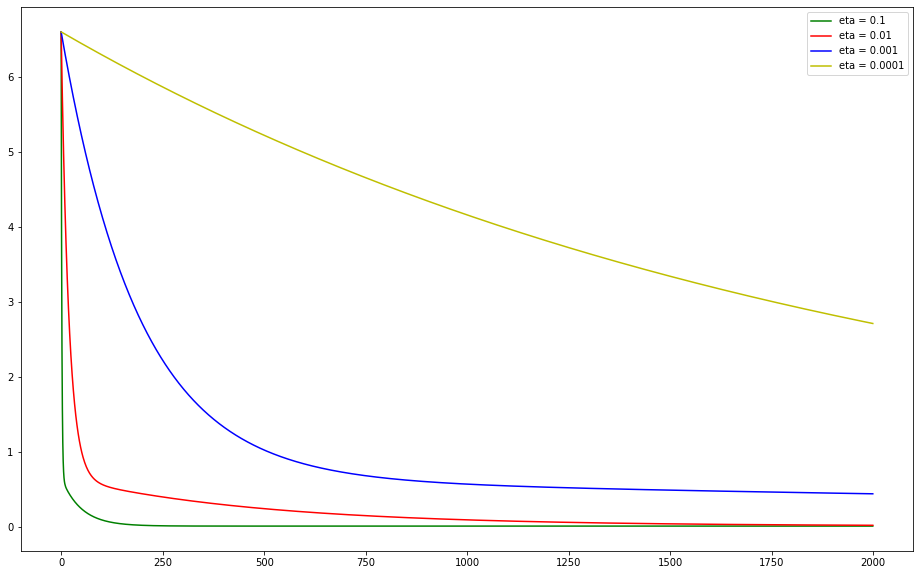

In [0]:
epochs = range(0,2000)
plt.figure(figsize=(16,10))
plt.plot(epochs, errs_1, "g")
plt.plot(epochs, errs_01,"r")
plt.plot(epochs, errs_001,"b")
plt.plot(epochs, errs_0001,"y")
plt.legend(["eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

# With LR Decay

In some cases, the learning rate might be too high to give good fitting lines. For example, let us train with constant LR of 0.8 and get the final line after 1000 iterations:

### $\eta$ = 0.8

In [0]:
errs = []
m, c = 0, 0
eta = 0.8
# Call the train() method for 1000 iterations to update m and c and get error value with constant eta = 0.8.
for times in range(1000):
    m, c, error = train(l, tsq, m, c, eta)
    errs.append(error)
    
m_normal, c_normal = m, c

Let us see the plot of error vs iterations:

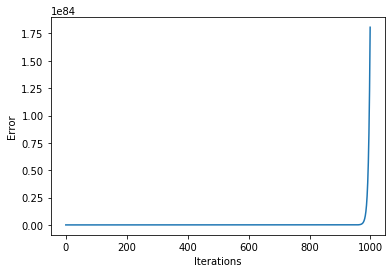

In [0]:
plt.plot(range(len(errs)), errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

We see that the error quickly goes to almost 0, but after some iterations blows up.

Let us check the "best fit" line that is found:

In [0]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_normal, c_normal, errs[-1]))

m = -6.43359e+41 c = -1.1198e+42 Error = 1.80675e+84


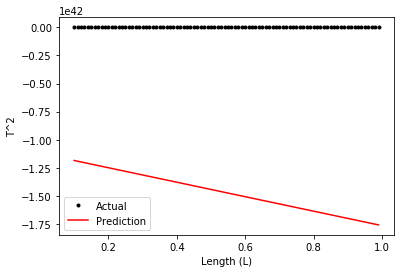

In [0]:
y = m_normal * l + c_normal 
plt.plot(l, tsq, '.k', label = 'Actual')
plt.plot(l,y,"r", label = 'Prediction')
plt.xlabel("Length (L)")
plt.ylabel("T^2")
plt.legend()
plt.show()

Clearly this is not ideal.

This was a simple case where we can see the learning rate is too high. There might be cases where it is not so simple to identify this. Also, having a low learning rate is not good because training time would be too high!

**Solution: Decay the learning rate.**

Now let us train another model with decaying lr. But let us not decay lr below 0.0001.

In [0]:
errs_decay = []
m, c = 0, 0
eta = 0.5
decay_factor = 0.99
# Call the train() method for 1000 iterations to update m and c and get error value with decaying eta.
for iteration in range(1000):
    eta = max(0.0001, eta * decay_factor)
    m, c, error = train(l, tsq, m, c, eta)
    errs_decay.append(error)

m_decay, c_decay = m, c

In [0]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_decay, c_decay, errs_decay[-1]))

m = 4.12371 c = 0.0837925 Error = 0.00708933


Let us see the plot of error vs iterations:

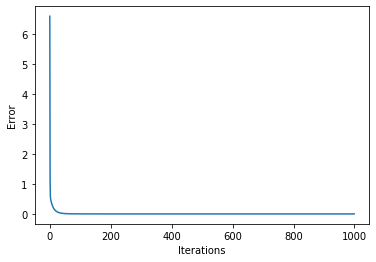

In [0]:
plt.plot(range(len(errs_decay)), errs_decay)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

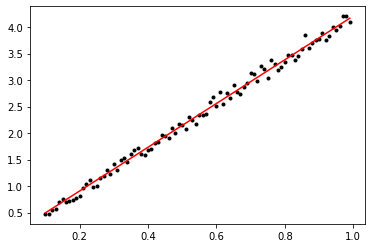

In [0]:
y = m_decay * l + c_decay 
plt.plot(l, tsq, '.k')
plt.plot(l,y,"r")
plt.show()

Thus, this is correct.